In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

import tensorflow as tf

%matplotlib inline
plt.style.use('seaborn-whitegrid')

### Classification (MNIST fashion)

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
fashion_mnist

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [4]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist

In [5]:
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [6]:
X_train.shape

(55000, 28, 28)

In [7]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

In [8]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [9]:
class_names[y_train[0]]

'Ankle boot'

In [10]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[28, 28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

# Another way of initializing the model is:
#
# model = tf.keras.Sequential([
# tf.keras.layers.Flatten(input_shape=[28, 28]),
# tf.keras.layers.Dense(300, activation="relu"),
# tf.keras.layers.Dense(100, activation="relu"),
# tf.keras.layers.Dense(10, activation="softmax")
# ])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.layers

In [13]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [14]:
model.get_layer('dense') is hidden1

True

In [15]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [16]:
weights.shape

(784, 300)

In [17]:
biases.shape

(300,)

In [18]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [19]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7220 - accuracy: 0.7647 - val_loss: 0.4961 - val_accuracy: 0.8328
Epoch 2/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4825 - accuracy: 0.8331 - val_loss: 0.4562 - val_accuracy: 0.8396
Epoch 3/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4368 - accuracy: 0.8473 - val_loss: 0.4233 - val_accuracy: 0.8550
Epoch 4/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4119 - accuracy: 0.8560 - val_loss: 0.3966 - val_accuracy: 0.8628
Epoch 5/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3909 - accuracy: 0.8634 - val_loss: 0.3889 - val_accuracy: 0.8612
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3748 - accuracy: 0.8692 - val_loss: 0.3926 - val_accuracy: 0.8600
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3627 - accuracy: 0.8709 - val_loss: 0.3706 - val_accuracy:

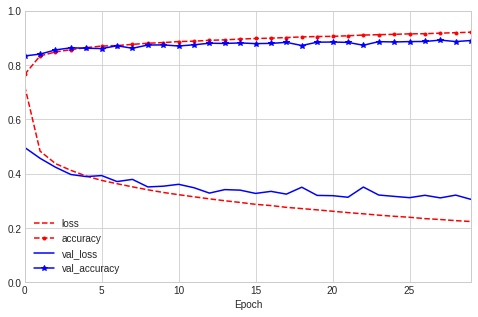

In [20]:
pd.DataFrame(history.history).plot(
figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
style=["r--", "r--.", "b-", "b-*"])
plt.show()

In [22]:
tf.keras.utils.plot_model(model)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [23]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3241 - accuracy: 0.8844


[0.324140727519989, 0.8844000101089478]

In [24]:
X_new = X_test[:3]
y_proba = model.predict(X_new)

In [25]:
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.02, 0.  , 0.97],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [26]:
y_pred = y_proba.argmax(axis=-1)

In [27]:
y_pred

array([9, 2, 1])

In [28]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

### Regression

In [29]:
# tf.random.set_seed(42)
# norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
# model = tf.keras.Sequential([
#     norm_layer,
#     tf.keras.layers.Dense(50, activation="relu"),
#     tf.keras.layers.Dense(50, activation="relu"),
#     tf.keras.layers.Dense(50, activation="relu"),
#     tf.keras.layers.Dense(1)
# ])

In [30]:
# optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
# model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])

In [31]:
# norm_layer.adapt(X_train)

In [ ]:
# history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
# mse_test, rmse_test = model.evaluate(X_test, y_test)
# X_new = X_test[:3]
# y_pred = model.predict(X_new)